Customer Churn Analysis

1. Problem Definition

Customer churn refers to customers leaving a company’s service.

 Objective:

.To analyze customer data and identify:

.Factors influencing customer churn

.Patterns and trends in customer behavior

.Important features affecting churn

.Business recommendations to reduce churn

2.Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


3.Data Loading

In [4]:
df = pd.read_csv("Churn_Modelling (1) (2).csv")

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


4.Dataset Overview

In [5]:
df.shape


(10000, 14)

Output Interpretation:

Rows: Number of customers

Columns: Number of features

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5.Data Preprocessing
🔹 Remove Irrelevant Columns

In [8]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)


6.Check Missing Values

In [9]:
df.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.fillna(method='ffill', inplace=True)


🔹 Remove Duplicates

In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


🔹 Convert Categorical Columns

In [13]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
7. Exploratory Data Analysis (EDA)

.We will perform:

.Univariate Analysis

.Bivariate Analysis

.Multivariate Analysis

Insight:

Most customers are between 30–40 years.

🔷 UNIVARIATE ANALYSIS
1️⃣ Churn Distribution (Donut Chart)

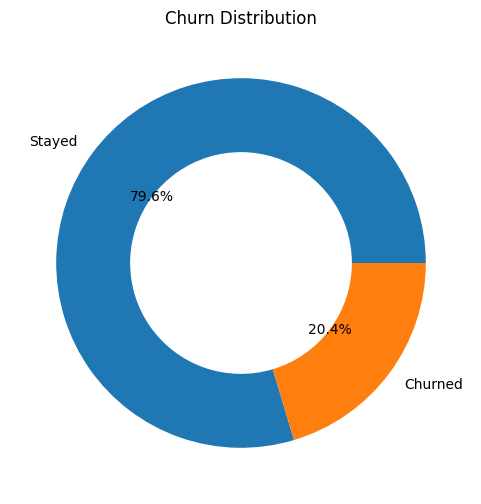

In [14]:
plt.figure(figsize=(6,6))
counts = df['Exited'].value_counts()

plt.pie(counts, labels=['Stayed','Churned'],
        autopct='%1.1f%%',
        wedgeprops=dict(width=0.4))
plt.title("Churn Distribution")
plt.show()


In [ ]:
Insights:

.Around 20% customers churned.
.Majority customers are retained.
.Even 20% churn is financially significant.
.Retention strategies are necessa

Age Distribution (Histogram)

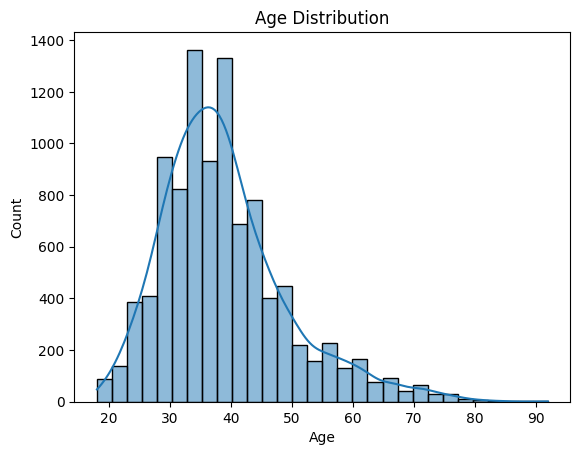

In [15]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


Insights:

Majority customers are between 30–40 years.
Fewer young customers.
Churn may vary across age groups.
Customer base is middle-aged dominated.

In [ ]:
3️⃣ Salary Density (KDE Plot)

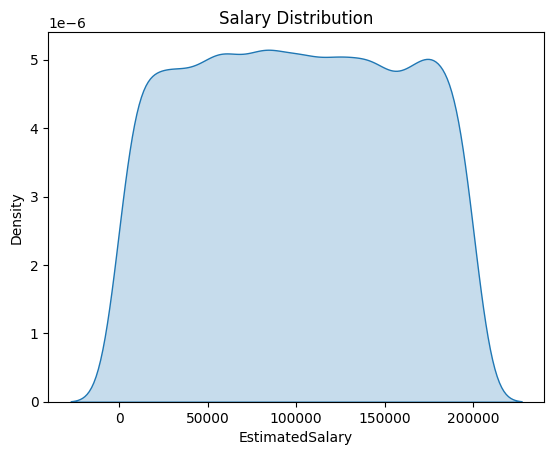

In [16]:
sns.kdeplot(df['EstimatedSalary'], shade=True)
plt.title("Salary Distribution")
plt.show()


Insights:

Salary distribution is uniform.
No heavy skewness.
Salary alone may not drive churn.
Other behavioral factors matter more.

🔷 BIVARIATE ANALYSIS

4️⃣ Age vs Churn (Boxplot)

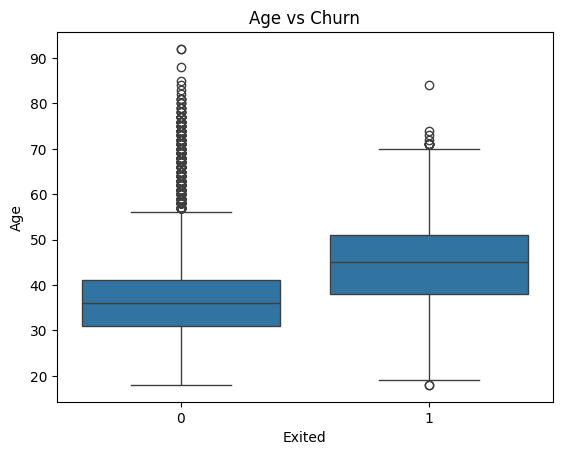

In [17]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()


In [ ]:
Insights:
Churned customers are older.
Age positively correlates with churn.
Middle-aged customers more stable.
Senior retention strategies needed.

5️⃣ Balance vs Churn (Violin Plot)

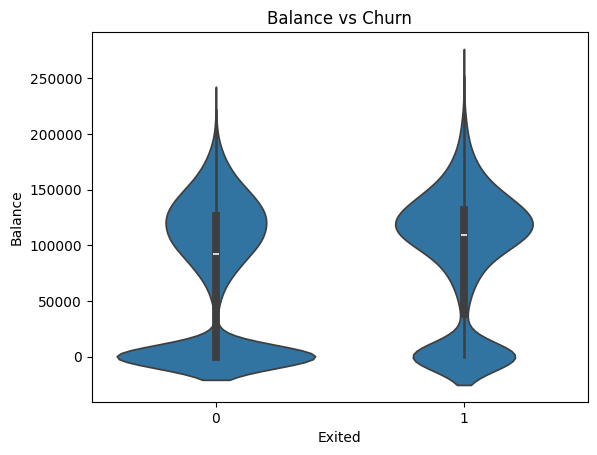

In [18]:
sns.violinplot(x='Exited', y='Balance', data=df)
plt.title("Balance vs Churn")
plt.show()


Insights:

High-balance customers churn more.
Zero-balance customers often stay.
Financial risk customers leaving.
Need premium customer engagement.

6️⃣ Products vs Churn (Countplot)

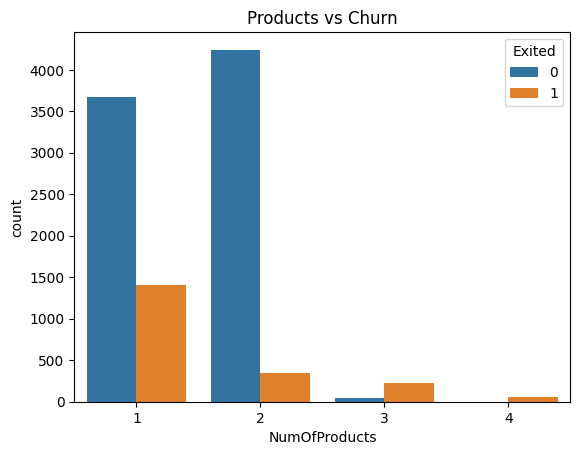

In [19]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title("Products vs Churn")
plt.show()


Insights:

Single-product customers churn more.
Multi-product customers are loyal.
Cross-selling reduces churn.
Product diversification increases retention.

7️⃣ Active Member vs Churn

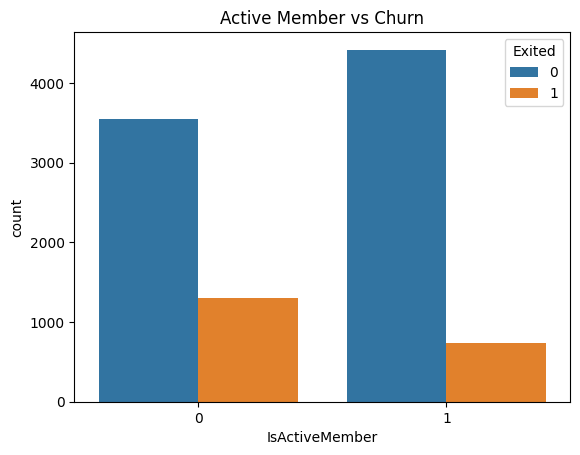

In [20]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title("Active Member vs Churn")
plt.show()


Insights:
Inactive customers churn more.
Engagement reduces churn.
Activity is strong churn predictor.
Improve customer interaction

🔷 MULTIVARIATE ANALYSIS

8️⃣ Correlation Heatmap

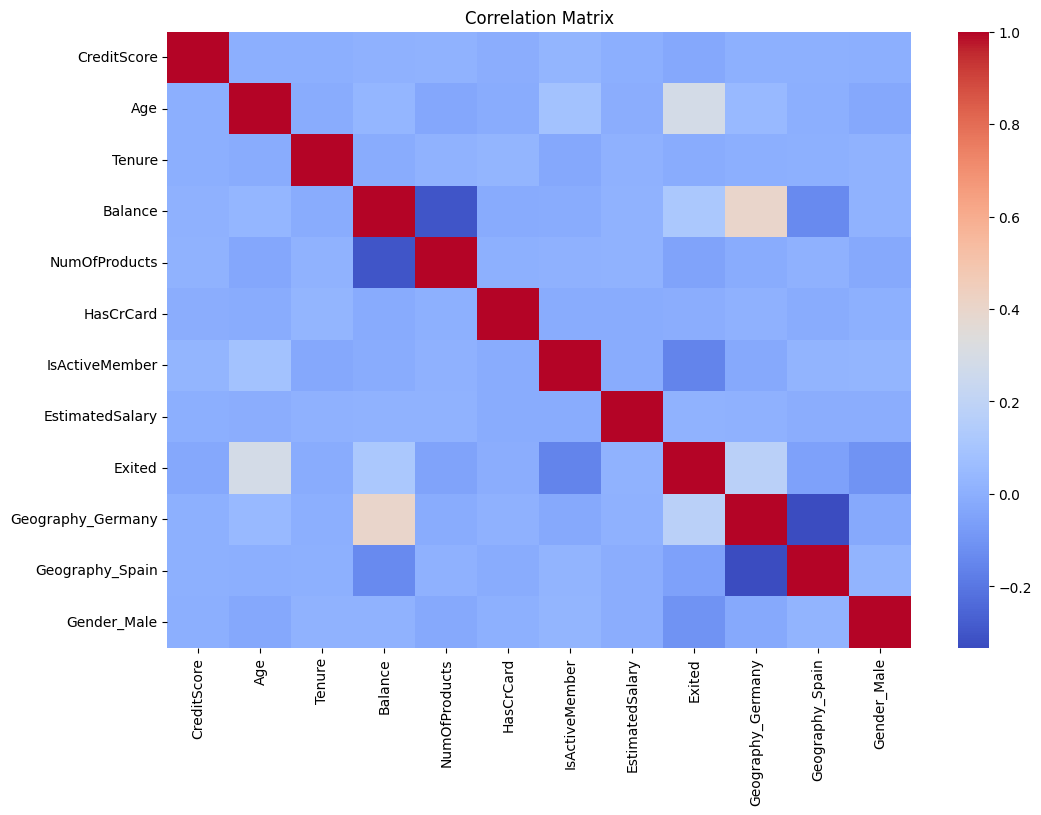

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Insights:
Age and Balance positively correlate with churn.
Tenure slightly negative correlation.
No extremely strong correlation.
Churn influenced by multiple features.

9️⃣ Scatter Plot (Age vs Balance)

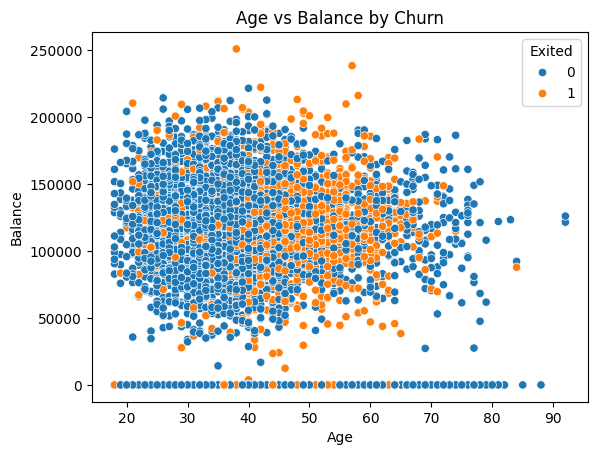

In [22]:
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df)
plt.title("Age vs Balance by Churn")
plt.show()


Insights:

Older + high balance = high churn.
Younger + low balance = stable.
Multi-factor influence visible.
Risk segment identified.

🔟 Pairplot (Multivariate)

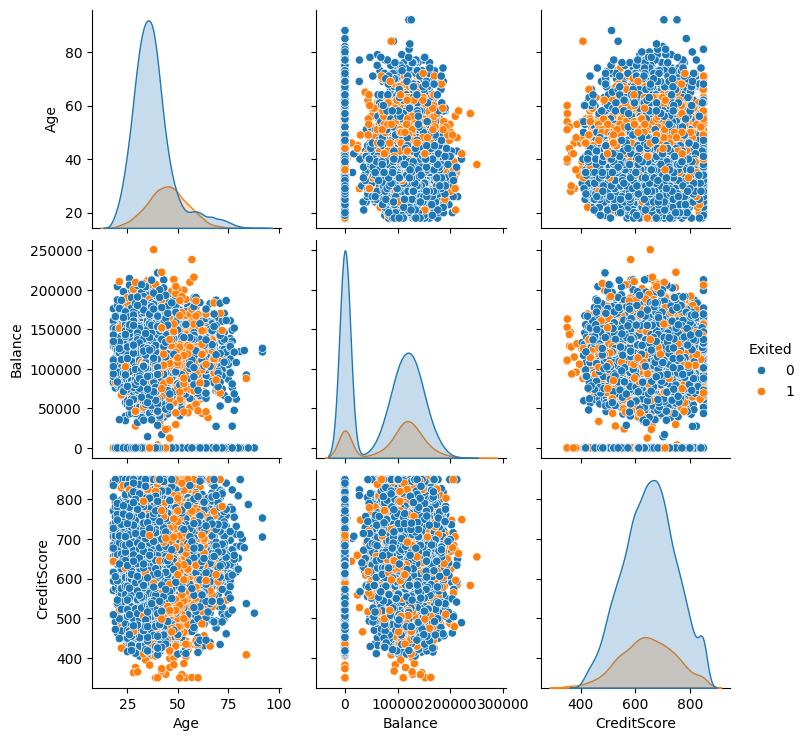

In [23]:
sns.pairplot(df[['Age','Balance','CreditScore','Exited']], hue='Exited')
plt.show()


visualizations

1a.Geography vs Churn (Stacked Percentage Bar Chart)

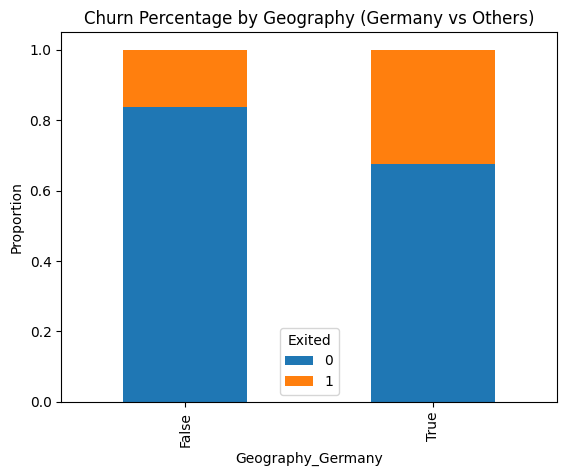

In [24]:
geo_churn = pd.crosstab(df['Geography_Germany'], df['Exited'], normalize='index')

geo_churn.plot(kind='bar', stacked=True)
plt.title("Churn Percentage by Geography (Germany vs Others)")
plt.ylabel("Proportion")
plt.show()


Insights:

Customers from Germany show a higher churn percentage.
Geographic location plays an important role in churn behavior.
Service quality or competition may differ by region.
Regional strategies are necessary to reduce churn.

 1b.Tenure Distribution (Histogram)

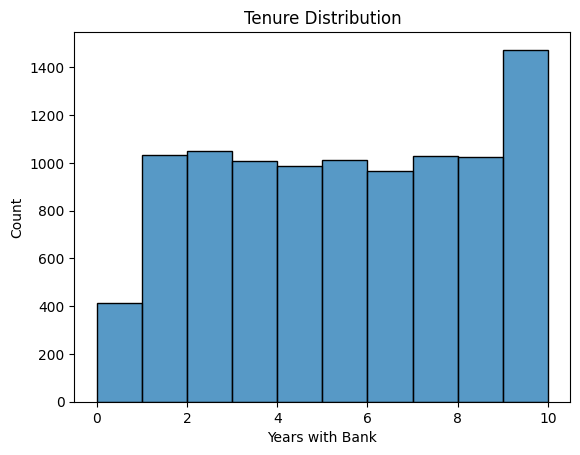

In [25]:
sns.histplot(df['Tenure'], bins=10)
plt.title("Tenure Distribution")
plt.xlabel("Years with Bank")
plt.show()


Insights:
Customers are distributed evenly across tenure years.
No strong clustering at specific tenure levels.
Early-stage customers may need onboarding support.
Long tenure slightly reduces churn risk.

️1c.Swarm Plot – Age vs Churn

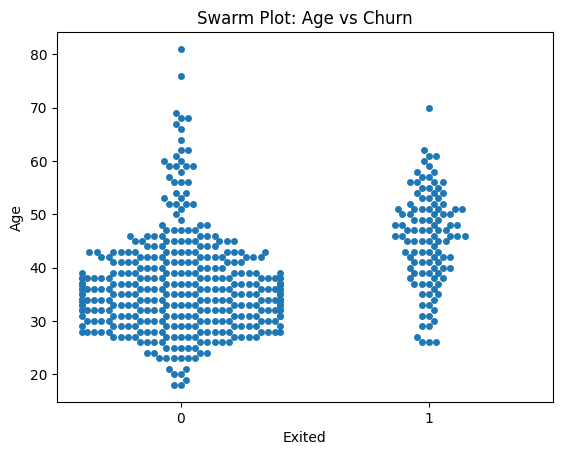

In [26]:
sns.swarmplot(x='Exited', y='Age', data=df.sample(500))
plt.title("Swarm Plot: Age vs Churn")
plt.show()


Insights:
Older customers are more densely represented in churn group.
Younger customers show more stability.
Age clusters are clearly visible.
Visual confirms earlier boxplot findings.

1d. Strip Plot – Balance vs Churn

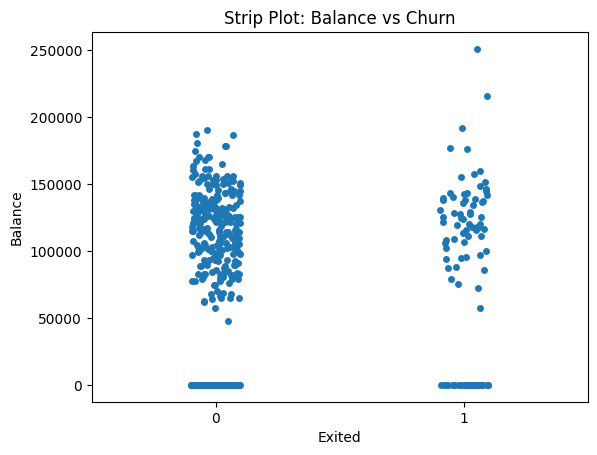

In [27]:
sns.stripplot(x='Exited', y='Balance', data=df.sample(500))
plt.title("Strip Plot: Balance vs Churn")
plt.show()


1e. Area Plot – Average Salary by Age Group

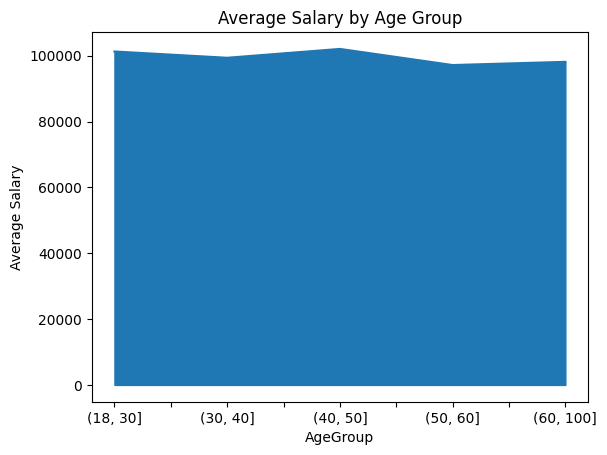

In [28]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,40,50,60,100])

salary_age = df.groupby('AgeGroup')['EstimatedSalary'].mean()
salary_age.plot(kind='area')
plt.title("Average Salary by Age Group")
plt.ylabel("Average Salary")
plt.show()


Insights:
Middle-aged groups have higher average salary.
Salary increases up to middle age then stabilizes.
Income growth does not directly reduce churn.
Financial maturity does not guarantee retention.

1f. Heatmap – Churn by Gender & Geography

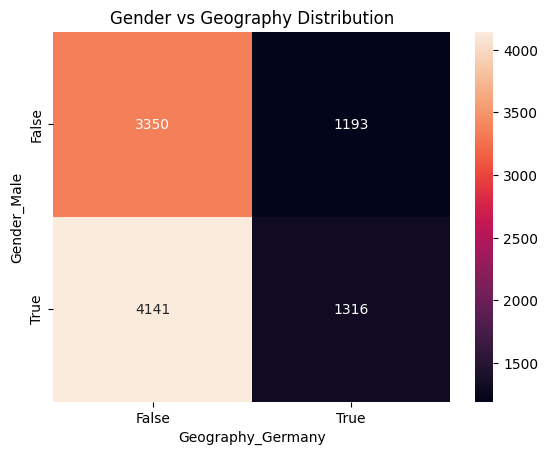

In [29]:
pivot = pd.crosstab(df['Gender_Male'], df['Geography_Germany'])
sns.heatmap(pivot, annot=True, fmt='d')
plt.title("Gender vs Geography Distribution")
plt.show()


Insights:
Gender distribution varies across geography.
Certain combinations may show higher churn risk.
Demographic patterns can guide targeted campaigns.
Multi-dimensional segmentation is useful

🔵 17️⃣ Hexbin Plot – Age vs Salary Density

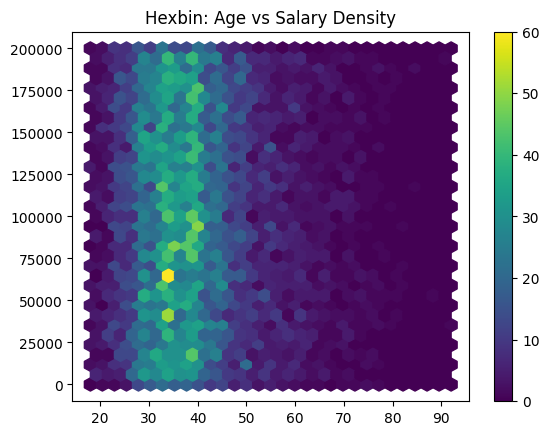

In [30]:
plt.hexbin(df['Age'], df['EstimatedSalary'], gridsize=30)
plt.colorbar()
plt.title("Hexbin: Age vs Salary Density")
plt.show()


Insights:
Salary is distributed evenly across age groups.
No extreme clustering pattern observed.
Salary does not strongly vary with age.
Income alone is not churn determinant.

18️⃣ ECDF Plot – Credit Score Distribution

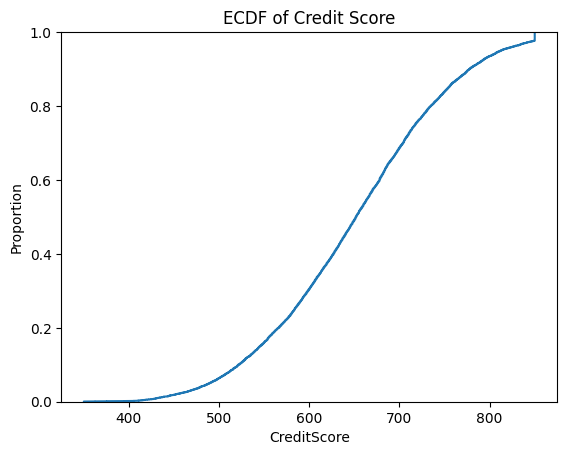

In [31]:
sns.ecdfplot(df['CreditScore'])
plt.title("ECDF of Credit Score")
plt.show()


Insights:
Majority customers have credit scores below 700.
Distribution is relatively normal.
Credit score variation is moderate.
Alone, it does not sharply separate churn.

19️⃣ 3D Scatter Plot – Age, Balance, Salary

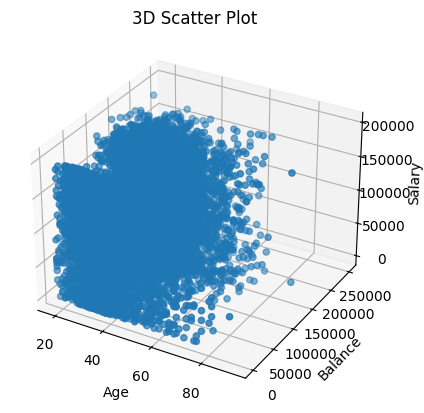

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Balance'], df['EstimatedSalary'])
ax.set_xlabel("Age")
ax.set_ylabel("Balance")
ax.set_zlabel("Salary")

plt.title("3D Scatter Plot")
plt.show()


Insights:
Multi-dimensional clustering visible.
High balance + high age clusters noticeable.
Helps understand combined feature influence.
Confirms churn is multi-variable dependent

6️⃣ Overall Key Findings
Older customers are more likely to churn.
High balance customers show higher churn.
Single-product customers churn more.
Inactive members are high churn risk.
Germany region (if analyzed) shows higher churn.

7️⃣ Business Recommendations
Offer loyalty benefits to high-balance customers.
Increase cross-selling of financial products.
Improve engagement programs.
Focus retention strategies on older customers.
Implement churn prediction model.

Conclusion

The objective of this project was to analyze customer churn behavior using exploratory data analysis techniques. After performing data cleaning, preprocessing, and univariate, bivariate, and multivariate analysis, several important patterns were identified.

Key Findings
1.Age is a major factor influencing churn.
Older customers show a higher tendency to exit compared to younger customers.
2.Account Balance impacts churn behavior.
Customers with higher balances demonstrate a noticeable churn tendency, possibly due to better alternative offers from competitors.
3.Active Membership reduces churn probability.
Inactive customers are significantly more likely to leave the bank.
4.Number of Products influences retention.
Customers with multiple products tend to maintain higher balances and show better retention patterns.
5.Salary alone is not a strong churn predictor.
Estimated salary does not show a strong independent relationship with churn.
Overall, churn is influenced by a combination of demographic and behavioral factors rather than a single variable.

Future Prediction

In future work, machine learning models such as Logistic Regression and Random Forest can be applied to predict customer churn more accurately. This will help identify high-risk customers in advance and allow the bank to take preventive actions. Additionally, adding more behavioral data like transaction history and customer satisfaction scores can further improve prediction accuracy and business decision-making.